In [2]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
qa = pd.read_csv("C:/Users/KNF/Downloads/2018_Child_and_Adult_Health_Care_Quality_Measures (1).csv")

Since the number of states reporting a given measure, as well as the median and quartiles of a given measure are repeated for every measure/state/population listing, I've decided to remove these columns from consideration.  Fiscal year reported is 2018 in all cases,so I am removing that column.

The notes section mostly deals with "NR" or not reported.  I will drop these values as recommended, since the national figures have excluded these states due to significant differences in methodology or reporting that make the values difficult to compare with othe rstates.

I am also filtering for the behavioral health care quality ratings only, as the client-level data is concerning individuals receiving behavioral health care.  

In [3]:
qa = qa.drop(columns=['Notes', 'Source','Methodology','State Specific Comments','Measure Name',
                      'Number of States Reporting', 'Median', 'Bottom Quartile','Top Quartile','FFY'])
#Dropping columns that are explanations of code columns, 
#or repeated for all measures (such as the number of states reporting a certain measure)
qa = qa[qa['Domain']=='Behavioral Health Care']
#Filtering for behavioral health domain

Since domain is now Behavioral Health Care for all rows, I am dropping that column

In [4]:
qa = qa.drop(columns=['Domain'])

In [5]:
qa.head()
#Checking the new dataset

,State,Reporting Program,Measure Abbreviation,Rate Definition,Population,State Rate,Rate Used in Calculating State Mean and Median
0,Alabama,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,Medicaid only,45.9,Yes
1,Alabama,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,Medicaid only,68.6,Yes
2,Alabama,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,CHIP only,34.7,No
3,Alabama,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,CHIP only,56.8,No
4,Alabama,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,Medicaid only,52.7,Yes


I am only going to keep the state rate values where "Rate used in calculating state mean and median" is "yes", because dataset owner has indicated that there are methodological issues with comparing this rate for listings where this variable is "no". Once that is set, I don't need this column any more, so I'll remove it

In [6]:
qa = qa[qa['Rate Used in Calculating State Mean and Median']=='Yes']
qa = qa.drop(columns = 'Rate Used in Calculating State Mean and Median')

Next, I want to know if there are any remaining null values:

In [7]:
null_data = qa[qa.isnull().any(axis=1)]
null_data

,State,Reporting Program,Measure Abbreviation,Rate Definition,Population,State Rate


In [8]:
qa.dtypes
#What data types are represented in the remaining columns?

State                   object
Reporting Program       object
Measure Abbreviation    object
Rate Definition         object
Population              object
State Rate              object
dtype: object

This dataset uses "#NR" or "NR" as a standin for "Not Reported" instead of null/NaN.  Without removing these values and replacing them with null or NaN, Python won't be able to convert my state rate column into a float datatype--it will remain as a string object.  In order to preform analyses, I'll need to replace the "NR" values with "NaN".

In [9]:
qa = qa.replace('NR', np.nan)
qa = qa.replace('#', np.nan)
qa['State Rate'] = qa['State Rate'].astype(float)

In [12]:
#Testing to ensure that the float percentages allow for mean calculations
qa.groupby(['State','Rate Definition']).mean().head()
#Grouping by child vs adult, state, and an individual quality measure
#mean state rate across popultaions (e.g., Medicaid Only, CHIP only, dual eligible, etc.) were calculated in State Rate column

State Rate
State   Rate Definition                                               
Alabama Percentage Diagnosed with Major Depression who ...        45.4
        Percentage Diagnosed with Major Depression who ...        31.0
        Percentage Newly Prescribed ADHD Medication wit...        52.7
        Percentage Newly Prescribed ADHD Medication wit...        96.6
        Percentage of Emergency Department (ED) Visits ...        11.4

In [13]:
#Reading in the client-level data
cld = pd.DataFrame(data= (pd.read_csv("C:/Users/KNF/Downloads/MH-CLD-2018-DS0001-bndl-data-tsv/MHCLD_PUF_2018.csv")))

In [14]:
#Previewing the data
cld.head()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2018,7,-9,3,6,2,2,1,1,2,...,0,0,0,0,0,0,1,6,3,20180000001
1,2018,13,-9,3,3,1,2,1,1,2,...,0,0,0,0,0,0,1,6,3,20180000002
2,2018,6,4,4,6,1,1,1,2,2,...,0,0,0,1,0,0,1,6,3,20180000003
3,2018,13,-9,4,2,2,1,2,2,2,...,0,0,0,0,0,0,1,6,3,20180000004
4,2018,14,5,4,3,1,1,1,2,2,...,0,0,0,1,0,0,1,6,3,20180000005


In [15]:
cld.dtypes
#Checking the data types

YEAR           int64
AGE            int64
EDUC           int64
ETHNIC         int64
RACE           int64
GENDER         int64
SPHSERVICE     int64
CMPSERVICE     int64
OPISERVICE     int64
RTCSERVICE     int64
IJSSERVICE     int64
MH1            int64
MH2            int64
MH3            int64
SUB            int64
MARSTAT        int64
SMISED         int64
SAP            int64
EMPLOY         int64
DETNLF         int64
VETERAN        int64
LIVARAG        int64
NUMMHS         int64
TRAUSTREFLG    int64
ANXIETYFLG     int64
ADHDFLG        int64
CONDUCTFLG     int64
DELIRDEMFLG    int64
BIPOLARFLG     int64
DEPRESSFLG     int64
ODDFLG         int64
PDDFLG         int64
PERSONFLG      int64
SCHIZOFLG      int64
ALCSUBFLG      int64
OTHERDISFLG    int64
STATEFIP       int64
DIVISION       int64
REGION         int64
CASEID         int64
dtype: object

I want to compare the child core quality ratings with the client-level health outcomes for children.  This is equivalent to the AGES values 1, 2, and 3.  4-14 represent adults.

Note that even though these are listed as 'int64', I know that these are all categorical values!

I want to create an AGEFLAG column that will filter the data between the ages of the child and adult core reporting programs in the qa dataset.  This will make it easier to plot qa measures against cld measures

In [16]:
#setting my Age criteria
conditions = [(cld['AGE'] < 0),
    (cld['AGE'] > 0) & (cld['AGE'] < 4),
    (cld['AGE'] >= 4)]

#here are the categories that those age criteria fit into
categories = ['NaN','Child Core','Adult Core']

#using a select statement to set the AGEFLAG column values
cld['AGEFLAG'] = np.select(conditions, categories)

#previewing the new dataset
cld.head()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,AGEFLAG
0,2018,7,-9,3,6,2,2,1,1,2,...,0,0,0,0,0,1,6,3,20180000001,Adult Core
1,2018,13,-9,3,3,1,2,1,1,2,...,0,0,0,0,0,1,6,3,20180000002,Adult Core
2,2018,6,4,4,6,1,1,1,2,2,...,0,0,1,0,0,1,6,3,20180000003,Adult Core
3,2018,13,-9,4,2,2,1,2,2,2,...,0,0,0,0,0,1,6,3,20180000004,Adult Core
4,2018,14,5,4,3,1,1,1,2,2,...,0,0,1,0,0,1,6,3,20180000005,Adult Core


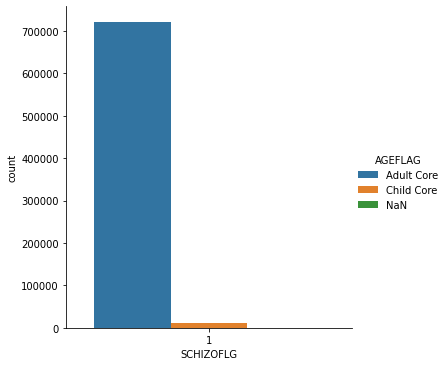

In [33]:
g = sns.catplot(x="SCHIZOFLG", kind="count", hue = 'AGEFLAG', data=cld[cld['SCHIZOFLG']>0])

In [20]:
#Making a table to show which MH1 values belong with which diagnosis categories
from prettytable import PrettyTable

Columns = ['Value','Description']

dx = PrettyTable()
dx.add_column(Columns[0], [1,2,3,4,5,6,7,8,9,10,11,12,13])
dx.add_column(Columns[1],["Trauma- and stressor-related disorders","Anxiety disorder","ADD/ADHD",
                          "Conduct disorders","Delirium, dementia ","Bipolar disorders","Depressive disorders",
                          "Oppositional defiant disorders","Pervasive developmental disorders",
                          "Personality disorders","Schizophrenia or other psychotic disorder",
                          "Alcohol or substance use disorders","Other disorders/unknown"])

print(dx)

+-------+-------------------------------------------+
| Value |                Description                |
+-------+-------------------------------------------+
|   1   |   Trauma- and stressor-related disorders  |
|   2   |              Anxiety disorder             |
|   3   |                  ADD/ADHD                 |
|   4   |             Conduct disorders             |
|   5   |            Delirium, dementia             |
|   6   |             Bipolar disorders             |
|   7   |            Depressive disorders           |
|   8   |       Oppositional defiant disorders      |
|   9   |     Pervasive developmental disorders     |
|   10  |           Personality disorders           |
|   11  | Schizophrenia or other psychotic disorder |
|   12  |     Alcohol or substance use disorders    |
|   13  |          Other disorders/unknown          |
+-------+-------------------------------------------+


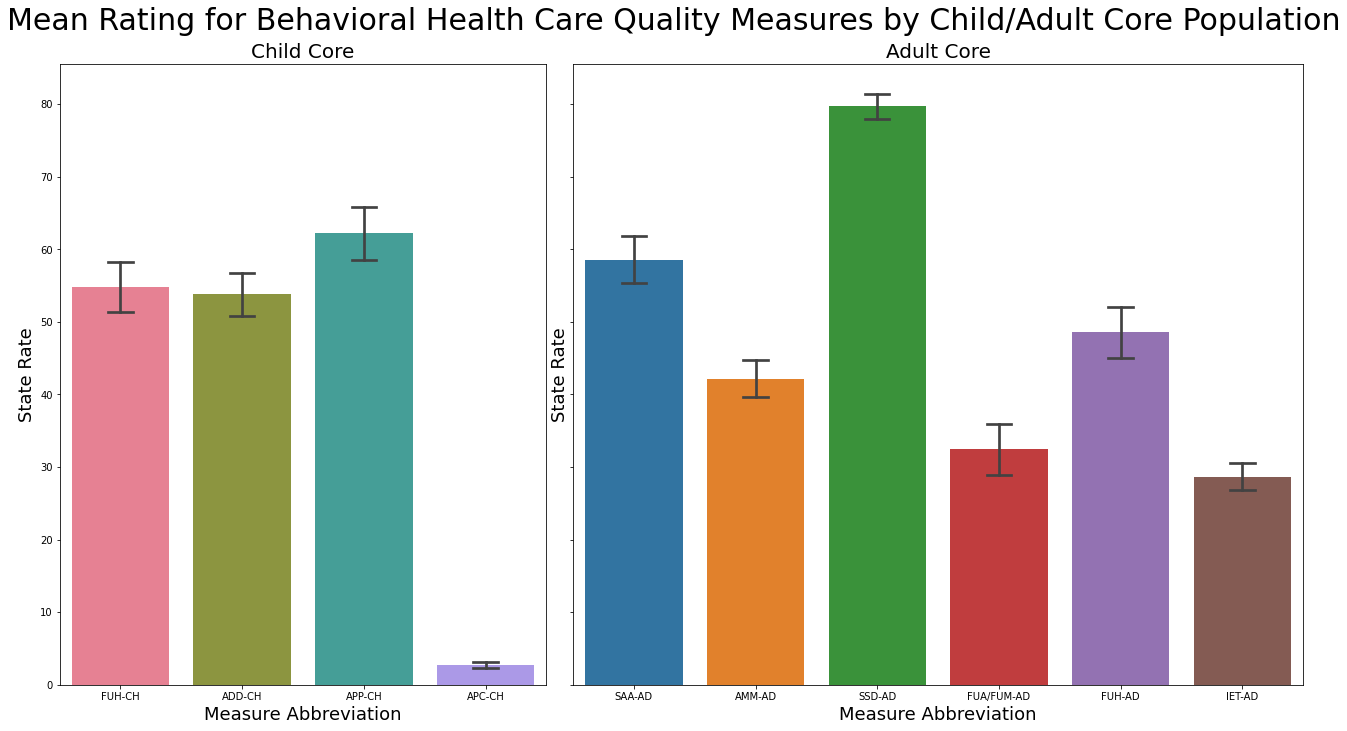

In [18]:
#Plotting 2 bar charts side-by-side using matplotlib
#I have 4 measures for the child core population and 6 for the adult core so I've adjusted the width ratio
#Sharing the y-axis for easier comprehension
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(18,10), gridspec_kw={'width_ratios': [2, 3]})

#Figure title
fig.suptitle('Mean Rating for Behavioral Health Care Quality Measures by Child/Adult Core Population', 
             fontsize = 30)

#Changing x/y axis label sizes for both subplots (axes)
ax1.xaxis.label.set_size(18)
ax2.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)

ax1.set_title("Child Core", fontsize = 20)
ax2.set_title("Adult Core", fontsize = 20)

#Removing some whitespace between the two subplots (axes)
fig.tight_layout()

#Creating the subplots

#Child core set barplot
g = sns.barplot(x="Measure Abbreviation", y = "State Rate",  
                data = qa[qa['Reporting Program']=='Child Core Set'],
                palette = "husl", capsize=.2, ax = ax1)

#Adult core set barplot
h = sns.barplot(x="Measure Abbreviation", y = "State Rate", 
                data = qa[qa['Reporting Program']=='Adult Core Set'],
                capsize=.2, ax = ax2)

plt.savefig("fig.png", bbox_inches='tight')

I want to plot some geographic data now.  Unfortunately my current dataset only contains state names, and not abbreviations.  All the geo json files I've found have used the state abbreviation rather than the state names.  To resolve this issue, I've found a csv of state names/abbreviations and will merge the abbreviations column into my qa dataset.

In [19]:
usa = pd.DataFrame(data= (pd.read_csv('C:/Users/KNF/Downloads/csvData.csv')))
#state names/abbreviations dataset

qa = pd.merge(left=usa, right=qa, how='inner', left_on = 'State', right_on = 'State')


In [20]:
qa2 = qa[qa['Reporting Program']=='Child Core Set'][['Code','State','Measure Abbreviation','Rate Definition','State Rate']]
qa2 = qa2[qa2['Rate Definition']=='Percentage of Hospitalizations for Mental Illness with a Follow-Up Visit Within 30 Days of Discharge: Ages 6-20']
qa2.head()

,Code,State,Measure Abbreviation,Rate Definition,State Rate
1,AL,Alabama,FUH-CH,Percentage of Hospitalizations for Mental Illn...,68.6
25,AK,Alaska,FUH-CH,Percentage of Hospitalizations for Mental Illn...,31.2
29,AZ,Arizona,FUH-CH,Percentage of Hospitalizations for Mental Illn...,77.7
47,AR,Arkansas,FUH-CH,Percentage of Hospitalizations for Mental Illn...,69.0
60,CA,California,FUH-CH,Percentage of Hospitalizations for Mental Illn...,80.4


In [21]:
qa2 = qa2.dropna(axis=0)
#dropping null values

In [28]:
from urllib.request import urlopen
import json
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"


red2blue = [[0, "rgb(227,26,28)"],
            [0.25, "rgb(251,154,153)"],
            [0.45, "rgb(51,160,44)"],
            [0.65, "rgb(178,223,138)"],
            [0.85, "rgb(31,120,180)"],
            [1, "rgb(166,206,227)"]]    
    
fuhch = px.choropleth(qa2, 
                    geojson=state_geo, locations='Code', color='State Rate',
                           scope = "usa",
                           title="Automatic Labels Based on Data Frame Column Names",
                           labels={'Color':'Follow-Up After Hospitalization for Mental Illness: Ages 6-20'},
                           color_continuous_scale= red2blue
                          )
fuhch.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fuhch.show()

In [29]:
qa3 = qa[qa['Reporting Program']=='Adult Core Set'][['Code','State','Measure Abbreviation','Rate Definition','State Rate']]
qa3 = qa3[qa3['Rate Definition']=='Percentage of Hospitalizations for Mental Illness with a Follow-Up Visit Within 30 Days of Discharge: Ages 21-64']
qa3.head()

,Code,State,Measure Abbreviation,Rate Definition,State Rate
15,AL,Alabama,FUH-AD,Percentage of Hospitalizations for Mental Illn...,55.3
37,AZ,Arizona,FUH-AD,Percentage of Hospitalizations for Mental Illn...,61.7
58,AR,Arkansas,FUH-AD,Percentage of Hospitalizations for Mental Illn...,53.3
74,CA,California,FUH-AD,Percentage of Hospitalizations for Mental Illn...,67.0
98,CT,Connecticut,FUH-AD,Percentage of Hospitalizations for Mental Illn...,70.4


In [30]:
fuhad = px.choropleth(qa3, 
                    geojson=state_geo, locations='Code', color='State Rate',
                           scope = "usa",
                           title="Automatic Labels Based on Data Frame Column Names",
                           labels={'Color':'Follow-Up After Hospitalization for Mental Illness: Ages 21-64'},
                           color_continuous_scale=red2blue
                          )
fuhad.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fuhad.show()

In [31]:
qa4 = qa.dropna(axis=0)
qa4.head()

,State,Abbrev,Code,Reporting Program,Measure Abbreviation,Rate Definition,Population,State Rate
0,Alabama,Ala.,AL,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,Medicaid only,45.9
1,Alabama,Ala.,AL,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,Medicaid only,68.6
2,Alabama,Ala.,AL,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,Medicaid only,52.7
3,Alabama,Ala.,AL,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,Medicaid only,96.6
4,Alabama,Ala.,AL,Child Core Set,APP-CH,Percentage who had a New Prescription for an A...,Medicaid only,66.2


In [396]:
qa

,State,Abbrev,Code,Reporting Program,Measure Abbreviation,Rate Definition,Population,State Rate
0,Alabama,Ala.,AL,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,Medicaid only,45.9
1,Alabama,Ala.,AL,Child Core Set,FUH-CH,Percentage of Hospitalizations for Mental Illn...,Medicaid only,68.6
2,Alabama,Ala.,AL,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,Medicaid only,52.7
3,Alabama,Ala.,AL,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,Medicaid only,96.6
4,Alabama,Ala.,AL,Child Core Set,APP-CH,Percentage who had a New Prescription for an A...,Medicaid only,66.2
...,...,...,...,...,...,...,...,...
849,Wyoming,Wyo.,WY,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,CHIP only,50.6
850,Wyoming,Wyo.,WY,Child Core Set,ADD-CH,Percentage Newly Prescribed ADHD Medication wi...,CHIP only,80.6
851,Wyoming,Wyo.,WY,Child Core Set,APC-CH,Percentage on Two or More Concurrent Antipsych...,Medicaid only,4.2
852,Wyoming,Wyo.,WY,Adult Core Set,FUH-AD,Percentage of Hospitalizations for Mental Illn...,Medicaid & Dual Eligibles,39.8
